# EDA 

In [1]:
#### Import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline
pd.set_option('display.max_columns',None)

In [2]:
## import dataset
Data = pd.read_csv('/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/FIFA WORLD CUP ANALYSIS PROJECT/Data/cleaned_worldcupmatches.csv')
Data.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


### Average Goles Per Match

In [3]:
### Adding two features for find total goals per match
Total_gols_per_match = Data['Away Team Goals'] + Data['Home Team Goals']

Avg_gl_pr_mch = Total_gols_per_match.mean()

result = int(Avg_gl_pr_mch)

print(f'Average Goals Per Match is {result}')

Average Goals Per Match is 2


## home and away win rates

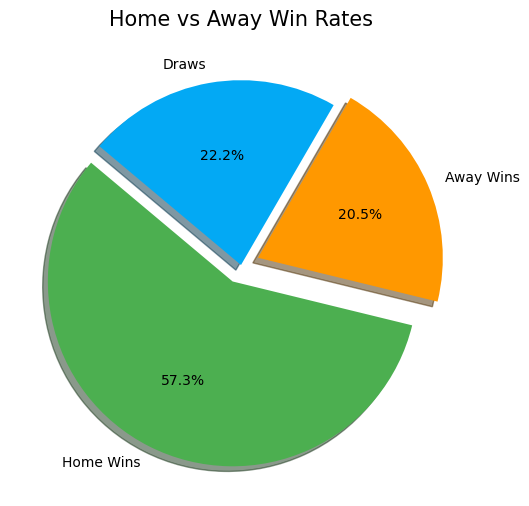

In [4]:
df = Data[['Home Team Goals','Away Team Goals']]


# Calculate the number of home wins, away wins, and draws
home_wins = (df['Home Team Goals'] > df['Away Team Goals']).sum()
away_wins = (df['Away Team Goals'] > df['Home Team Goals']).sum()
draws = (df['Home Team Goals'] == df['Away Team Goals']).sum()
total_matches = len(df)

# Data for pie chart
labels = ['Home Wins', 'Away Wins', 'Draws']
sizes = [home_wins, away_wins, draws]
colors = ['#4CAF50', '#FF9800', '#03A9F4']  # Custom colors
explode = (0.1, 0.1, 0)  # Explode the Home and Away Wins

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Home vs Away Win Rates', fontsize = 15)
plt.show()

### observation:

1. Home team win rate is more then heigher away win rates (57.3)
2. Draw rates and Away win rates are mostly equal 

## Attendance Trends

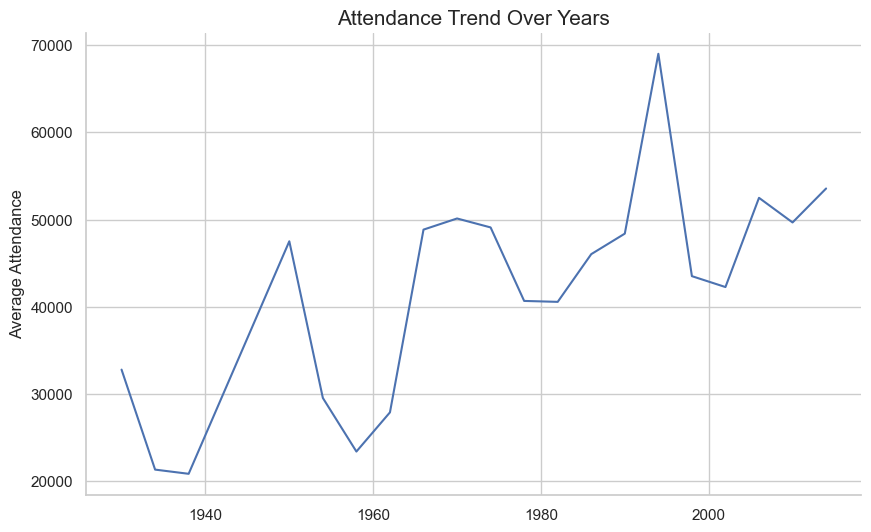

In [5]:
# Group by year to find average attendance
yearly_attendance = Data.groupby('Year')['Attendance'].mean().reset_index()


# Set plot style without gridlines
sns.set(style="whitegrid", rc={'axes.grid': False})


# Plotting the attendance trend using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_attendance, x='Year', y='Attendance', color='b', markers='O')
sns.despine()
sns.set_theme(style= 'ticks')

# Adding labels and title

plt.xlabel('')
plt.ylabel('Average Attendance')
plt.title('Attendance Trend Over Years', fontsize = 15)
plt.grid(True)

# Show the plot
plt.show()

## popular stadiums.

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_60094/2843946325.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popular_stadiums.head(10), x='Attendance', y='Stadium', palette= 'dark:b')
/Users/inazawaelectronics/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


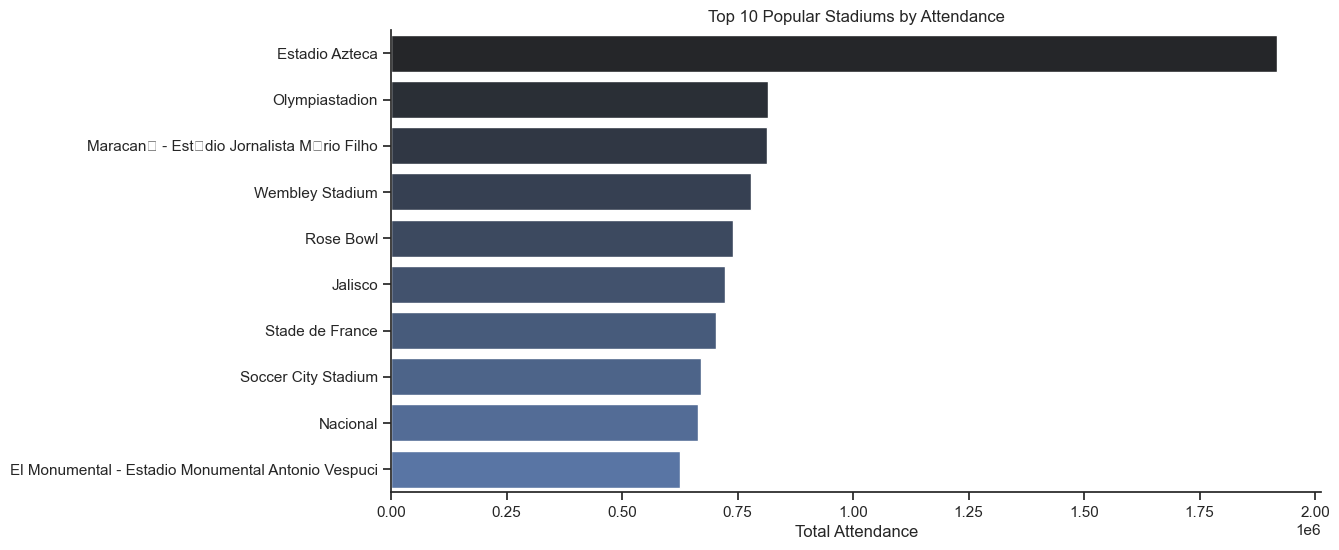

In [6]:
# Group by stadium name and sum the attendance
stadium_attendance = Data.groupby('Stadium')['Attendance'].sum().reset_index()

# Sort by attendance in descending order
popular_stadiums = stadium_attendance.sort_values(by='Attendance', ascending=False)

# Display the top stadiums
popular_stadiums.head(10)

# Count matches played at each stadium
stadium_match_count = Data.groupby('Stadium')['Datetime'].count().reset_index()
stadium_match_count.rename(columns={'Datetime': 'match_count'}, inplace=True)

# Merge with attendance data
popular_stadiums = popular_stadiums.merge(stadium_match_count, on='Stadium')

# Sort by attendance
popular_stadiums = popular_stadiums.sort_values(by='Attendance', ascending=False)

popular_stadiums.head(10)

# Set the size of the plot
plt.figure(figsize=(12, 6))


# Create a bar plot for the top stadiums
sns.set_theme(style='ticks')
sns.barplot(data=popular_stadiums.head(10), x='Attendance', y='Stadium', palette= 'dark:b')
sns.despine()
plt.title('Top 10 Popular Stadiums by Attendance')
plt.xlabel('Total Attendance')
plt.ylabel('')
plt.show()

In [7]:
popular_stadiums.head(10)

,Stadium,Attendance,match_count
0,Estadio Azteca,1917550.0,19
1,Olympiastadion,815300.0,14
2,Maracan� - Est�dio Jornalista M�rio Filho,813541.0,8
3,Wembley Stadium,778034.0,9
4,Rose Bowl,740807.0,8
5,Jalisco,722456.0,14
6,Stade de France,704000.0,9
7,Soccer City Stadium,670859.0,8
8,Nacional,663771.0,10
9,El Monumental - Estadio Monumental Antonio Ves...,625389.0,9


## high-scoring teams

In [8]:
### home teams total goals
home_goals = Data.groupby('Home Team Name')['Home Team Goals'].sum().reset_index()

### away team total goals
away_goals = Data.groupby('Away Team Name')['Away Team Goals'].sum().reset_index()

# Rename columns for merging
home_goals.rename(columns={'Home Team Name': 'team', 'Home Team Goals': 'total_goals'}, inplace=True)
away_goals.rename(columns={'Away Team Name': 'team', 'Away Team Goals': 'total_goals'}, inplace=True)

### concat home and away 
team_goals = pd.concat([home_goals,away_goals])

### group by sum total goals by team name
team_goals = team_goals.groupby('team')['total_goals'].sum().reset_index()

# Sort teams by total goals in descending order
heigh_scoring_teams = team_goals.sort_values(by= 'total_goals', ascending= False).head(10)

heigh_scoring_teams


,team,total_goals
7,Brazil,221.0
2,Argentina,131.0
29,Germany FR,131.0
39,Italy,128.0
26,France,106.0
28,Germany,93.0
66,Spain,92.0
34,Hungary,87.0
47,Netherlands,86.0
74,Uruguay,80.0


/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_60094/3424248355.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=heigh_scoring_teams, x='total_goals', y='team', palette= 'dark:b')


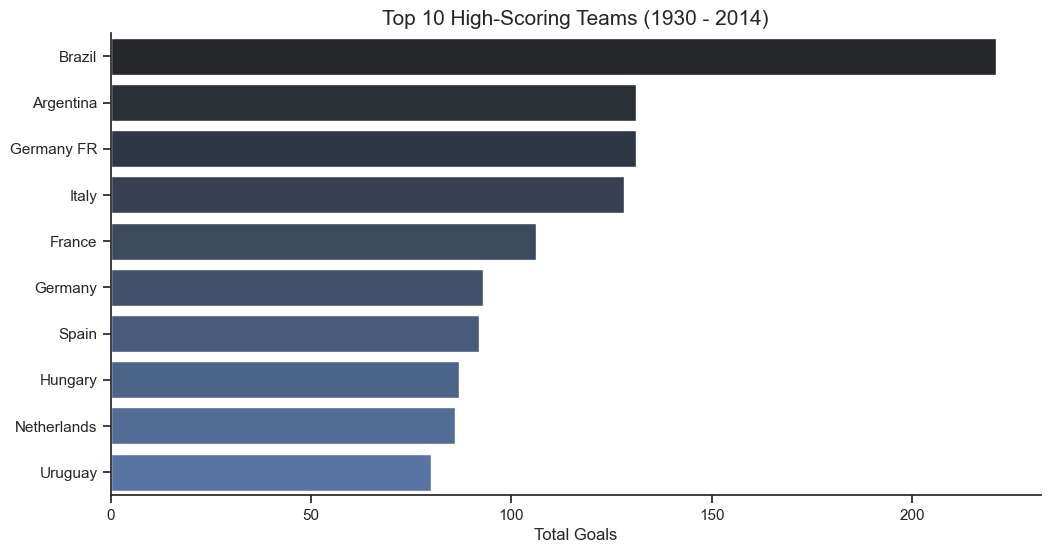

In [9]:

# Set the size of the plot
plt.figure(figsize=(12, 6))
sns.set_theme(style='ticks')

# Create a bar plot for the top high-scoring teams
sns.barplot(data=heigh_scoring_teams, x='total_goals', y='team', palette= 'dark:b')
sns.despine()
plt.title('Top 10 High-Scoring Teams (1930 - 2014)', fontsize = 15)
plt.xlabel('Total Goals')
plt.ylabel('')
plt.show()

# Frequent Matchups

In [10]:
# Sort teams alphabetically within each row to ensure unique representation of matchups
Data['matchup'] = Data.apply(lambda row: '-'.join(sorted([row['Home Team Name'], row['Away Team Name']])), axis=1)

# Count each matchup occurrence
matchup_count = Data['matchup'].value_counts().reset_index()
matchup_count.columns = ['matchup', 'count']
matchup_count = matchup_count.sort_values(by= 'count', ascending= False).head(10)
matchup_count

,matchup,count
0,Brazil-Sweden,7
6,Argentina-Netherlands,5
9,Argentina-England,5
8,Brazil-Netherlands,5
7,Brazil-Spain,5
1,Brazil-Czechoslovakia,5
5,Argentina-Italy,5
3,Brazil-Italy,5
2,France-Italy,5
4,Germany FR-Yugoslavia,5


/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_60094/497839731.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=matchup_count, x='count', y='matchup', palette=colors)


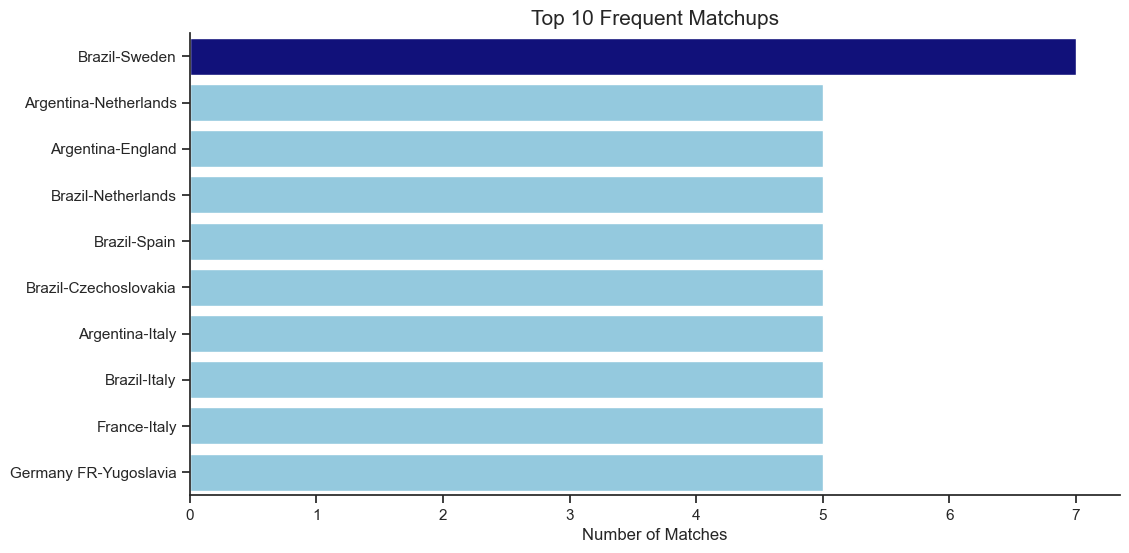

In [11]:
# Set the size of the plot
plt.figure(figsize=(12, 6))
#sns.set_theme(style= 'ticks')
## identify the heigher value count feature row index
max_value_index = matchup_count['count'].idxmax()

# Create a color list, setting one color for the max value and another for the rest
colors = ['#00008B' if i == max_value_index else '#87CEEB' for i in range(len(matchup_count))]

# Plot the top frequent matchups
sns.barplot(data=matchup_count, x='count', y='matchup', palette=colors)
sns.despine()
sns.set_theme(style= 'ticks')
plt.title('Top 10 Frequent Matchups', fontsize = 15)
plt.xlabel('Number of Matches')
plt.ylabel('')
plt.show()

### Observation:

1. Heighest matchups Brazil vs Sweden 7 matches
2. In top 10 matchups 2nd to 10th matchups are same (5)

In [12]:
matchup_count['count'].idxmax()

0

In [13]:
Data.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,matchup
0,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,France-Mexico
1,1930.0,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,Belgium-USA
2,1930.0,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Brazil-Yugoslavia
3,1930.0,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Peru-Romania
4,1930.0,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Argentina-France


In [14]:
Data['Stage'].unique()

array(['Group 1', 'Group 4', 'Group 2', 'Group 3', 'Semi-finals', 'Final',
       'Preliminary round', 'Quarter-finals', 'Match for third place',
       'First round', 'Group 6', 'Group B', 'Group A', 'Group 5',
       'Group C', 'Group D', 'Group F', 'Group E', 'Round of 16',
       'Group H', 'Group G', 'Third place', 'Play-off for third place'],
      dtype=object)

##  Performance By Stages

In [15]:
## find total goals per match
Data['Match_goals'] = Data['Away Team Goals'] + Data['Home Team Goals']

## Group by total goals by stages
stage_performance = Data.groupby('Stage')['Match_goals'].sum().reset_index()

### indentify each stages total matches
stage_performance['No_Match'] = Data.groupby('Stage')['Datetime'].count().values

## create a new feature average goal per match in each stages
stage_performance['Avg_match_goal'] = stage_performance['Match_goals'] / stage_performance['No_Match']
stage_performance['Avg_match_goal'] = stage_performance['Avg_match_goal'].astype(int)
stage_performance

,Stage,Match_goals,No_Match,Avg_match_goal
0,Final,68.0,19,3
1,First round,44.0,9,4
2,Group 1,174.0,62,2
3,Group 2,187.0,59,3
4,Group 3,154.0,56,2
5,Group 4,176.0,55,3
6,Group 5,9.0,6,1
7,Group 6,57.0,12,4
8,Group A,160.0,60,2
9,Group B,169.0,60,2


/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_60094/69381734.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stage_performance, x='Stage', y='Match_goals', palette="viridis")


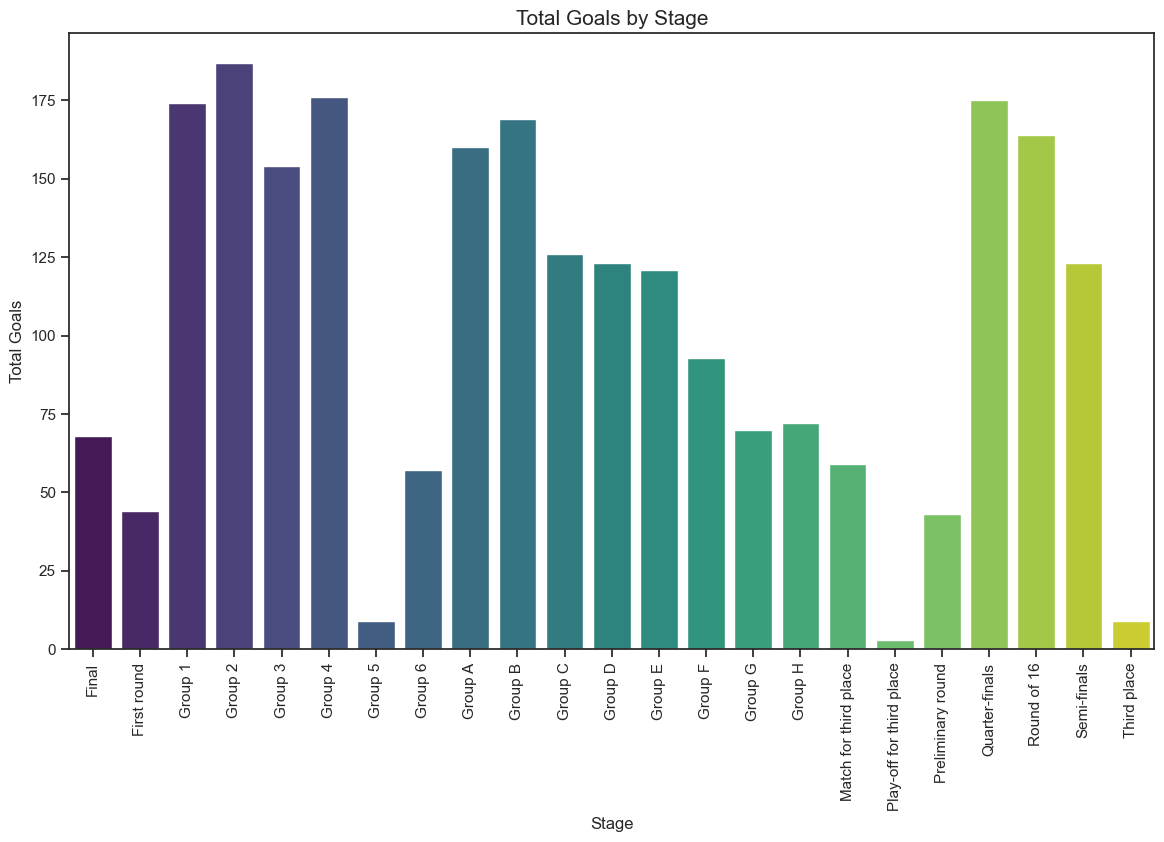

In [16]:
## Vosualize Total goals per stages

plt.figure(figsize=(14, 8))
sns.barplot(data=stage_performance, x='Stage', y='Match_goals', palette="viridis")
plt.xticks(rotation=90)
plt.title("Total Goals by Stage", fontsize = 15)
plt.xlabel("Stage")
plt.ylabel("Total Goals")
plt.show()


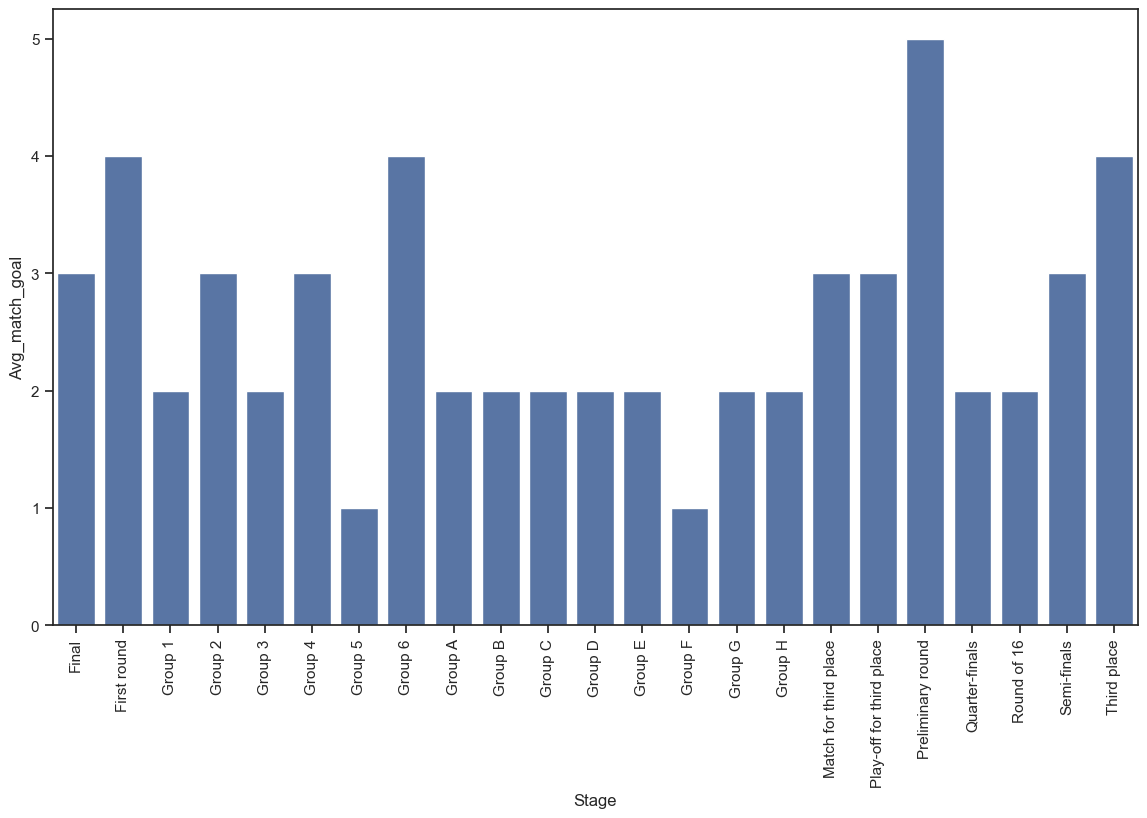

In [17]:
## visualizing average goal per match in stage vise
plt.figure(figsize=(14, 8))

sns.barplot(data= stage_performance, x = 'Stage', y = 'Avg_match_goal' )
plt.xticks(rotation=90)
plt.show()

In [18]:
Data['Win conditions'].unique()

array([' ', 'Austria win after extra time ',
       'Italy win after extra time ', 'Brazil win after extra time ',
       'Czechoslovakia win after extra time ',
       'Hungary win after extra time ',
       'Northern Ireland win after extra time ',
       'England win after extra time ',
       'Germany FR win after extra time ',
       'Uruguay win after extra time ', 'Argentina win after extra time ',
       ' win on penalties (5 - 4) ', 'Belgium win after extra time ',
       'France win on penalties (3 - 4) ',
       'Germany FR win on penalties (4 - 1) ',
       'Belgium win on penalties (4 - 5) ',
       'France win after extra time ', 'Cameroon win after extra time ',
       'Republic of Ireland win on penalties (5 - 4) ',
       'Yugoslavia win after extra time ', ' win on penalties (2 - 3) ',
       ' win on penalties (3 - 4) ', ' win on penalties (4 - 3) ',
       'Bulgaria win on penalties (1 - 3) ',
       'Sweden win on penalties (4 - 5) ',
       'Brazil win on penaltie

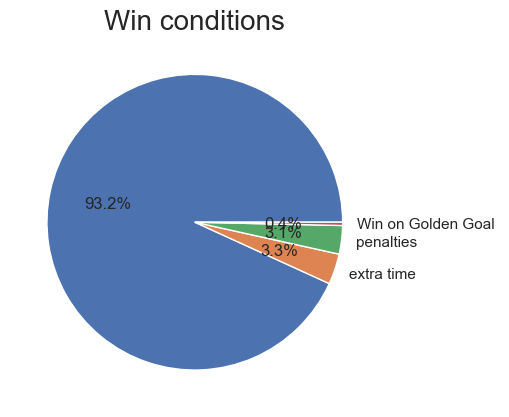

In [21]:
# Replace values using regex to categorize into 'extra time' and 'penalties'
df = Data.copy()
df['win_condition'] = df['Win conditions'].replace(
    {
        r'.*win after extra time.*': 'extra time',
        r'.*win on penalties.*': 'penalties'
    },
    regex=True
)
df = df['win_condition'].value_counts()


plt.pie(df.values, labels= df.index, autopct= '%0.1f%%')
plt.title('Win conditions', fontsize = 20)
plt.show()